## Домашняя работа 5

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [54]:
import numpy as np
import pandas as pd


data = pd.read_csv('non_linear.csv', sep=',')

data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


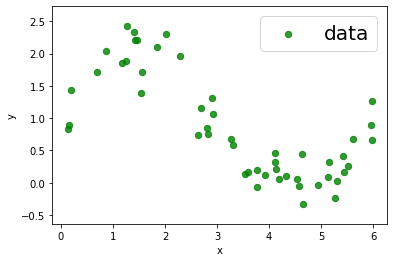

In [53]:


import matplotlib.pyplot as plt
%matplotlib inline

margin = 0.3

# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')

# различные "украшения"
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.xlabel('x')
plt.ylabel('y')
plt.show()


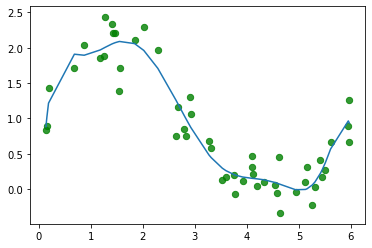

In [159]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

best_degree = 0
max_r2_score = 0
best_predict = None

def generate_degrees(source_data: list, degree: int):
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

def calc_r2_score(d):
    X = generate_degrees(data.x_train, d)
    model = LinearRegression().fit(X, data.y_train)
    y_pred = model.predict(X)
    return y_pred, r2_score(data.y_train, y_pred)


for d in range(1,11):
    best_predict, r2 = calc_r2_score(d)
    if r2 > max_r2_score:
        max_r2_score = r2
        best_degree = d
        best_model = model


plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.plot(data.x_train, best_predict)

plt.show()

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисяемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [236]:
from numpy.linalg import inv

class CustomLinearReg:
    model_ = None
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        ext = np.insert(np.expand_dims(X.to_numpy(), axis=1), 0, 1, axis=1)
        self.model_ = (inv((ext.T).dot(ext))).dot(ext.T).dot(y)
        return self
    
    def predict(self, X):
        return self.model_[0] + X*self.model_[1]

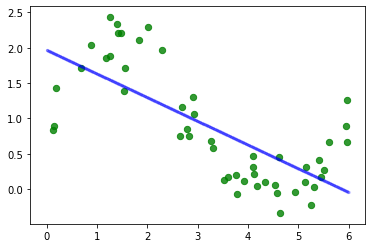

In [255]:
# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')

model = CustomLinearReg().fit(data['x_train'], data['y_train'])

y_pred = []
x_test = np.linspace(0, 6, 1000)
for t in x_test:
    y_pred.append(model.predict(t))

plt.scatter(x_test, y_pred, 5, 'b', alpha=0.1, label='data')
    
plt.show()

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid)
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [328]:
def ndprint(a, format_string ='{0:.2f}'):
    """Функция, которая распечатывает список в красивом виде"""
    return [format_string.format(v,i) for i,v in enumerate(a)]

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

boston_dataset = load_boston()

data = boston_dataset.data
y = boston_dataset.target

def train(features, target):
    train_size = int(features.shape[0]*0.8)
    valid_size = features.shape[0] - train_size

    train = features[:train_size]
    target_train = target[:train_size]
    model = LinearRegression().fit(train, target_train)
    print("Коэффициенты, вычисленные моделью sklearn \n%s" % ndprint(model.coef_))

    valid = features[train_size:train_size + valid_size]
    target_valid = target[train_size:train_size + valid_size]
    target_pred = model.predict(valid);

    return r2_score(target_valid, target_pred)

print(train(data, y))
transformed_data = StandardScaler().fit_transform(data)
print(train(transformed_data, y))


Коэффициенты, вычисленные моделью sklearn 
['-0.20', '0.04', '0.05', '1.88', '-14.93', '4.76', '0.00', '-1.30', '0.46', '-0.02', '-0.81', '-0.00', '-0.53']
-0.21985315040422004
Коэффициенты, вычисленные моделью sklearn 
['-1.74', '1.03', '0.36', '0.48', '-1.73', '3.34', '0.08', '-2.74', '4.02', '-2.62', '-1.76', '-0.18', '-3.80']
-0.21985315040423248


Метрика почти не изменилась